- **Purpose:** Cell type annotation using canonical marker genes from PanglaoDB with decoupler package following its (decoupler's) tutorial
- **Date:** July 26, 2025

# 0. Import packages and read data

In [18]:
# Install packages
!pip install decoupler
!pip install scanpy

In [19]:
# Import packages
import pandas as pd
import numpy as np
import scanpy as sc
import decoupler as dc
import seaborn as sns

In [20]:
# Print package versions
sc.logging.print_header()

/usr/local/lib/python3.11/dist-packages/session_info2/__init__.py:125: UserWarning: The '__version__' attribute is deprecated and will be removed in MarkupSafe 3.1. Use feature detection, or `importlib.metadata.version("markupsafe")`, instead.
  and (v := getattr(pkg, "__version__", None))


AttributeError: 'HBox' object has no attribute '_repr_mimebundle_'

pandas	2.2.2
matplotlib	3.10.0
numpy	2.0.2
scanpy	1.11.3
decoupler	2.1.1
anndata	0.12.1
seaborn	0.13.2
----	----
numexpr	2.11.0
jupyter-client	6.1.12
pickleshare	0.7.5
pydata-google-auth	1.9.1
platformdirs	4.3.8
google-cloud-firestore	2.21.0
cryptography	43.0.3
cloudpickle	3.1.1
sphinxcontrib-applehelp	2.0.0
ipython	7.34.0
jupyter_core	5.8.1
setuptools	75.2.0
h5py	3.14.0
cffi	1.17.1
google-cloud-translate	3.21.1
debugpy	1.8.15
decorator	4.4.2
propcache	0.3.2
google-resumable-media	2.7.2
google-cloud-bigquery	3.35.0
threadpoolctl	3.6.0
joblib	1.5.1
proto-plus	1.26.1
zstandard	0.23.0
frozenlist	1.7.0
pexpect	4.9.0
google-cloud-bigquery-connection	1.18.3
pytest	8.4.1
google-cloud-spanner	3.55.0
scipy	1.15.3
fastrlock	0.8.3
yarl	1.20.1
ipykernel	6.17.1
donfig	0.8.1.post1
pluggy	1.6.0
xgboost	3.0.2
grpc-google-iam-v1	0.14.2
numba	0.60.0
toolz	0.12.1
grpcio-status	1.71.2
legacy-api-wrap	1.4.1
networkx	3.5
zarr	3.1.0
six	1.17.0
google-ai-generativelanguage	0.6.15
google-cloud-aiplatform	1.105

In [21]:
# Load adata
adata = dc.ds.pbmc3k()
adata

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'percent_mito', 'n_counts', 'celltype', 'leiden'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    obsp: 'distances', 'connectivities'

<Axes: xlabel='n_counts', ylabel='Count'>

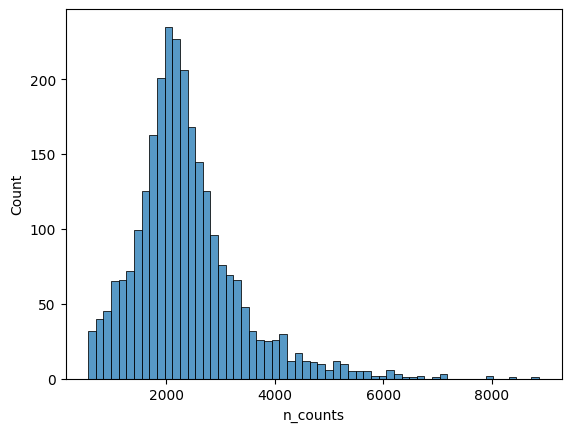

In [22]:
# Visualize the counts
sns.histplot(adata.obs.n_counts)

<Axes: ylabel='Count'>

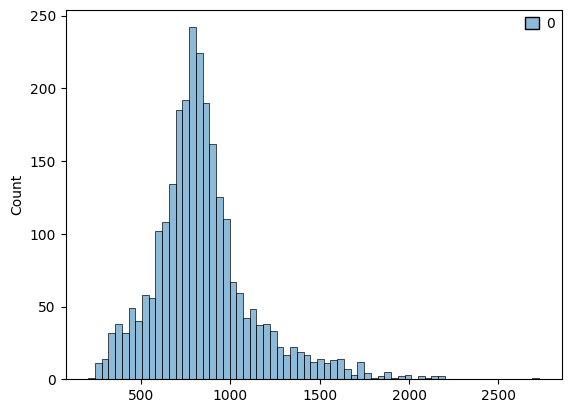

In [23]:
# Look at X
sns.histplot(adata.X.sum(1))

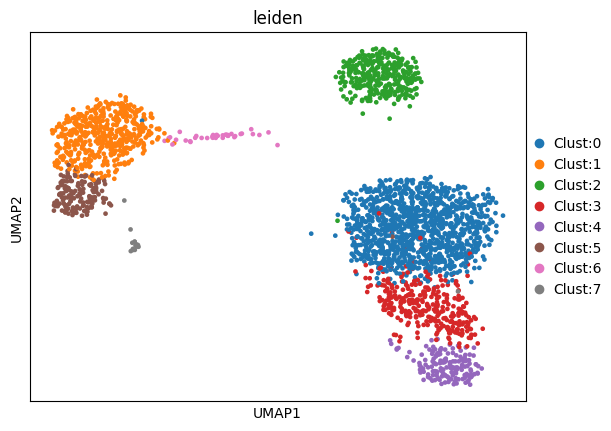

In [24]:
# UMAP
sc.pl.umap(adata, color="leiden")

# 1. Marker perpeartion
Canoncial marker genes for the cell-types are downloaded and further processed for downstream anlaysis

In [25]:
dc.op.show_resources()

,name,license
0,Adhesome,commercial
1,Almen2009,commercial
2,Baccin2019,academic
3,CORUM_Funcat,academic
4,CORUM_GO,academic
...,...,...
76,iTALK,academic
77,kinase.com,non_profit
78,scConnect,commercial
79,scConnect_complex,commercial


In [26]:
# Markers from PanglaoDB
markers = dc.op.resource("PanglaoDB", organism = "human")
markers

HTTPError: 500 Server Error: Internal Server Error for url: https://omnipathdb.org/annotations?databases=PanglaoDB&license=academic

In [27]:
# Using manually downloaded marker genes as the dc.op.resource() was returing internal server error
!gzip -d PanglaoDB_markers_27_Mar_2020.tsv.gz

In [30]:
# Read the markers
markers = pd.read_csv("PanglaoDB_markers_27_Mar_2020.tsv", sep = "\t")
markers = markers[markers["species"] == "Hs"]
markers

,species,official gene symbol,cell type,nicknames,ubiquitousness index,product description,gene type,canonical marker,germ layer,organ,sensitivity_human,sensitivity_mouse,specificity_human,specificity_mouse
22,Hs,CTRB2,Acinar cells,NaN,0.001,chymotrypsinogen B2,protein-coding gene,1.0,Endoderm,Pancreas,0.916667,0.0,0.001258,0.0
26,Hs,REG1A,Acinar cells,PSPS|PSPS1|REG,0.005,regenerating family member 1 alpha,protein-coding gene,1.0,Endoderm,Pancreas,1.000000,0.0,0.027359,0.0
31,Hs,SERPINA3,Acinar cells,AACT,0.000,serpin family A member 3,protein-coding gene,1.0,Endoderm,Pancreas,0.000000,0.0,0.000314,0.0
33,Hs,REG1B,Acinar cells,PSPS2|REGH|REGI-BETA,0.002,regenerating family member 1 beta,protein-coding gene,1.0,Endoderm,Pancreas,0.916667,0.0,0.011006,0.0
37,Hs,C15ORF48,Acinar cells,NMES1|MIR147BHG,0.018,chromosome 15 open reading frame 48,protein-coding gene,1.0,Endoderm,Pancreas,1.000000,0.0,0.109119,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8179,Hs,S100P,Trophoblast cells,NaN,0.009,S100 calcium binding protein P,protein-coding gene,NaN,Zygote,Embryo,0.000000,0.0,0.051065,0.0
8189,Hs,SIGLEC6,Trophoblast cells,OB-BP1|SIGLEC-6|CD327|CD33L|CD33L1,0.000,sialic acid binding Ig like lectin 6,protein-coding gene,NaN,Zygote,Embryo,0.000000,0.0,0.000000,0.0
8195,Hs,CGB3,Trophoblast cells,CGB,0.000,chorionic gonadotropin subunit beta 3,protein-coding gene,NaN,Zygote,Embryo,0.000000,0.0,0.000000,0.0
8203,Hs,ERVFRD-1,Trophoblast cells,HERV-W/FRD|HERV-FRD|envFRD|ERVFRDE1|syncytin-2,0.000,"endogenous retrovirus group FRD member 1, enve...",protein-coding gene,1.0,Zygote,Embryo,0.000000,0.0,0.000627,0.0


In [31]:
# Look at the columns
markers.columns

Index(['species', 'official gene symbol', 'cell type', 'nicknames',
       'ubiquitousness index', 'product description', 'gene type',
       'canonical marker', 'germ layer', 'organ', 'sensitivity_human',
       'sensitivity_mouse', 'specificity_human', 'specificity_mouse'],
      dtype='object')

In [38]:
# Manipulate the markers dataframe
markers = markers[
    markers["canonical marker"].astype(bool) # keep the canonical markers only
    & markers["sensitivity_human"].astype(float) > 0.5 # keep genes with high human sensitivity
]

# Remove duplicates
markers = markers[~markers.duplicated(["cell type", "official gene symbol"])]

# Format
markers = markers.rename(columns = {"cell type": "source", "official gene symbol": "target"})
markers

,species,target,source,nicknames,ubiquitousness index,product description,gene type,canonical marker,germ layer,organ,sensitivity_human,sensitivity_mouse,specificity_human,specificity_mouse
22,Hs,CTRB2,Acinar cells,NaN,0.001,chymotrypsinogen B2,protein-coding gene,1.0,Endoderm,Pancreas,0.916667,0.0,0.001258,0.0
26,Hs,REG1A,Acinar cells,PSPS|PSPS1|REG,0.005,regenerating family member 1 alpha,protein-coding gene,1.0,Endoderm,Pancreas,1.000000,0.0,0.027359,0.0
33,Hs,REG1B,Acinar cells,PSPS2|REGH|REGI-BETA,0.002,regenerating family member 1 beta,protein-coding gene,1.0,Endoderm,Pancreas,0.916667,0.0,0.011006,0.0
37,Hs,C15ORF48,Acinar cells,NMES1|MIR147BHG,0.018,chromosome 15 open reading frame 48,protein-coding gene,1.0,Endoderm,Pancreas,1.000000,0.0,0.109119,0.0
39,Hs,AKR1C3,Acinar cells,KIAA0119|DDX|HAKRB|PGFS|HSD17B5,0.007,aldo-keto reductase family 1 member C3,protein-coding gene,1.0,Endoderm,Pancreas,1.000000,0.0,0.038994,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7790,Hs,IL32,T cells,NK4|TAIF|TAIFb|TAIFd,0.036,interleukin 32,protein-coding gene,1.0,Mesoderm,Immune system,0.976285,0.0,0.138482,0.0
7804,Hs,CD8B,T cells,CD8B1,0.003,CD8b molecule,protein-coding gene,NaN,Mesoderm,Immune system,0.177866,0.0,0.001701,0.0
7806,Hs,GZMH,T cells,CGL-2|CCP-X|CSP-C|CTSGL2,0.005,granzyme H,protein-coding gene,NaN,Mesoderm,Immune system,0.075099,0.0,0.027560,0.0
7850,Hs,CCL4L2,T cells,NaN,0.002,C-C motif chemokine ligand 4 like 2,protein-coding gene,1.0,Mesoderm,Immune system,0.011858,0.0,0.013950,0.0


In [41]:
markers["source"].value_counts()

,count
source,
Dendritic cells,20
Hepatocytes,13
Langerhans cells,12
NK cells,9
Erythroid-like and erythroid precursor cells,9
T cells,8
Plasma cells,8
Monocytes,7
Basal cells,6


# 2. Cell-type annotation

In [42]:
# Scoring
dc.mt.ulm(data = adata, net = markers, tmin = 3)

In [44]:
adata.obsm["score_ulm"]

,B cells,B cells naive,Dendritic cells,Gamma delta T cells,Hepatocytes,Langerhans cells,Macrophages,Monocytes,NK cells,Neutrophils,T cells
index,,,,,,,,,,,
AAACATACAACCAC-1,1.037693,-0.454221,7.119547,-0.406252,-0.351811,0.051974,-0.406252,0.372274,-0.574614,1.037693,2.042720
AAACATTGAGCTAC-1,7.731421,2.318432,17.382285,0.376353,-0.460741,10.024038,-0.532039,2.874564,-0.752534,1.637170,-0.651663
AAACATTGATCAGC-1,-0.439111,-0.566934,5.909434,1.640880,-0.439111,-0.841095,-0.507061,0.141026,3.770835,1.526334,3.683563
AAACCGTGCTTCCG-1,7.034561,1.092099,22.714301,-0.468478,-0.405698,10.539252,2.478354,7.854173,0.143440,7.809048,-0.573810
AAACCGTGTATGCG-1,1.828893,-0.393707,11.930864,8.139689,-0.304941,0.530486,-0.352129,0.931137,5.499639,-0.304941,-0.431300
...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,7.377386,0.866533,20.913978,-0.509350,1.412740,8.964257,2.109345,6.915367,-0.720441,8.478364,-0.623872
TTTCTACTGAGGCA-1,5.180776,0.318471,12.993601,-0.526857,-0.456254,5.237323,-0.526857,3.440672,-0.745205,-0.456254,-0.645316
TTTCTACTTCCTCG-1,14.211888,6.030032,20.797149,-0.371575,1.285704,14.736947,-0.371575,5.188620,-0.525565,-0.321781,-0.455119


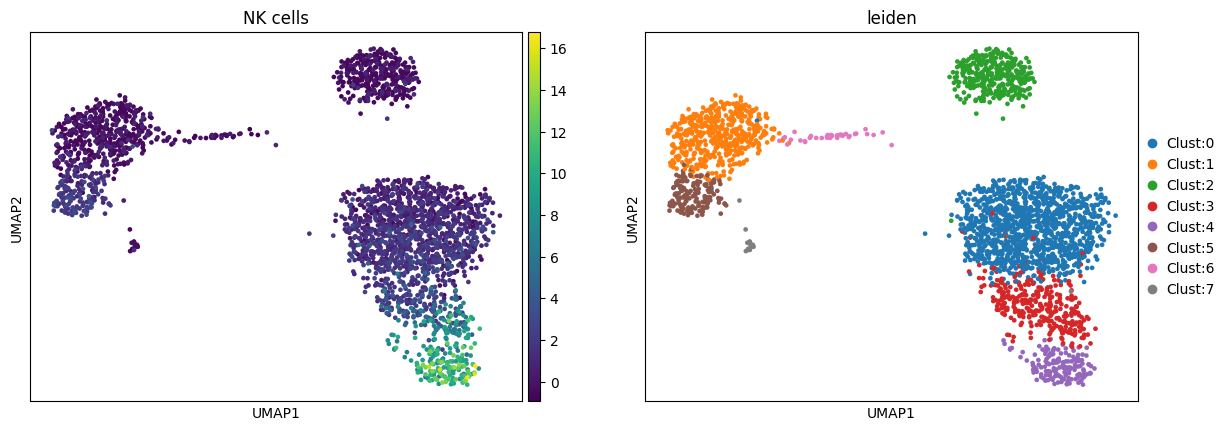

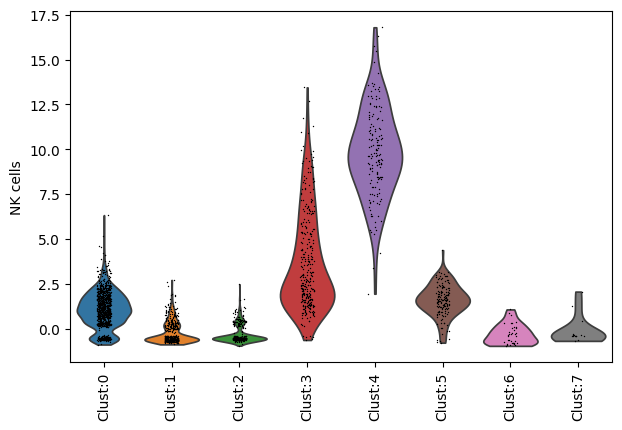

In [45]:
# Visualize scores
score = dc.pp.get_obsm(adata, key = "score_ulm") # Get the scores into a separate variable
sc.pl.umap(score, color = ["NK cells", "leiden"])
sc.pl.violin(score, keys = ["NK cells"], groupby = "leiden", rotation = 90)

In [46]:
# Top predicted cell-types
df = dc.tl.rankby_group(adata = score,
                        groupby = "leiden",
                        reference = "rest",
                        method = "t-test_overestim_var")
df = df[df["stat"] > 0]
df

,group,reference,name,stat,meanchange,pval,padj
9,Clust:0,rest,T cells,11.907076,0.862237,1.411710e-31,1.552881e-31
11,Clust:2,rest,B cells,46.369385,8.107335,7.500397e-213,8.250436e-212
12,Clust:2,rest,Langerhans cells,39.173457,9.173210,8.602837e-175,4.731560e-174
13,Clust:2,rest,B cells naive,33.081590,5.048475,5.668610e-113,2.078490e-112
14,Clust:2,rest,Dendritic cells,22.526200,7.352930,5.222502e-78,1.436188e-77
18,Clust:2,rest,Monocytes,10.404964,1.847080,1.435055e-22,1.973201e-22
22,Clust:1,rest,Neutrophils,61.863583,6.938878,0.000000e+00,0.000000e+00
23,Clust:1,rest,Monocytes,32.312352,4.868803,2.312696e-155,1.271983e-154
24,Clust:1,rest,Dendritic cells,24.400120,7.122165,3.309637e-100,1.213534e-99
25,Clust:1,rest,Hepatocytes,20.069527,1.273779,3.436706e-73,9.450941e-73


In [47]:
# Extract top 3 predicted cell-types per cluster
n_ctypes = 3
ctypes_dict = df.groupby("group").head(n_ctypes).groupby("group")["name"].apply(lambda x: list(x)).to_dict()
ctypes_dict

{'Clust:0': ['T cells'],
 'Clust:1': ['Neutrophils', 'Monocytes', 'Dendritic cells'],
 'Clust:2': ['B cells', 'Langerhans cells', 'B cells naive'],
 'Clust:3': ['T cells', 'NK cells', 'Gamma delta T cells'],
 'Clust:4': ['NK cells', 'Gamma delta T cells', 'Macrophages'],
 'Clust:5': ['Macrophages', 'Hepatocytes', 'Monocytes'],
 'Clust:6': ['Langerhans cells', 'Dendritic cells', 'B cells'],
 'Clust:7': []}

Note that cluster 7 could not be identified indiciating that the canonical marker genes for this cell type were not in the *markers* dataframe. A newer version of the dataset should have been downloaded

dendrogram data not found (using key=True). Running `sc.tl.dendrogram` with default parameters. For fine tuning it is recommended to run `sc.tl.dendrogram` independently.


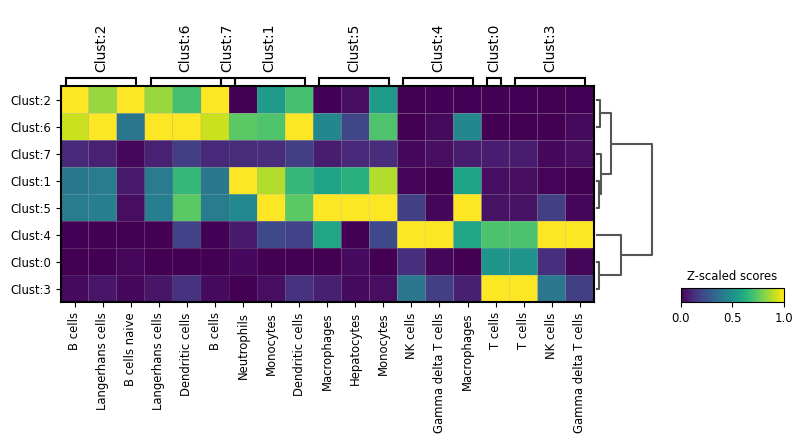

In [49]:
# Visualize the top predicted genes
sc.pl.matrixplot(
    adata=score,
    var_names=ctypes_dict,
    groupby="leiden",
    dendrogram="True",
    standard_scale="var",
    colorbar_title="Z-scaled scores"
)

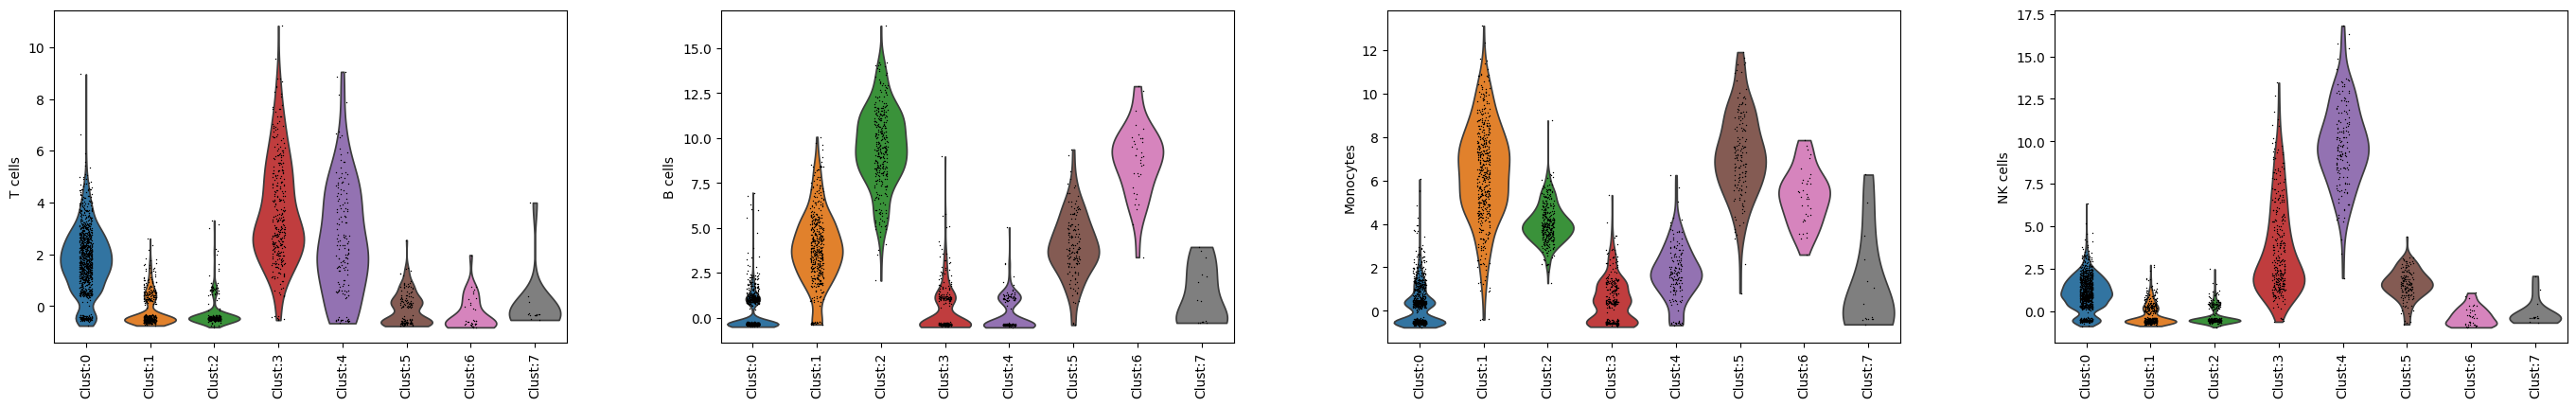

In [51]:
# Violin plot
sc.pl.violin(
    adata=score,
    keys=["T cells", "B cells", "Monocytes", "NK cells"],
    groupby="leiden",
    rotation=90
)

In [55]:
# Annotation
dict_ann = df[df["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()
dict_ann["Clust:7"] = "Platelets" # Based on tutorials
dict_ann

{'Clust:0': 'T cells',
 'Clust:2': 'B cells',
 'Clust:1': 'Neutrophils',
 'Clust:4': 'NK cells',
 'Clust:3': 'T cells',
 'Clust:5': 'Macrophages',
 'Clust:6': 'Langerhans cells',
 'Clust:7': 'Platelets'}

In [57]:
# Add cell type column
adata.obs["cell_type"] = adata.obs["leiden"].map(dict_ann)
adata.obs["cell_type"].value_counts()

,count
cell_type,
T cells,1460
Neutrophils,480
B cells,342
NK cells,154
Macrophages,150
Langerhans cells,37
Platelets,15


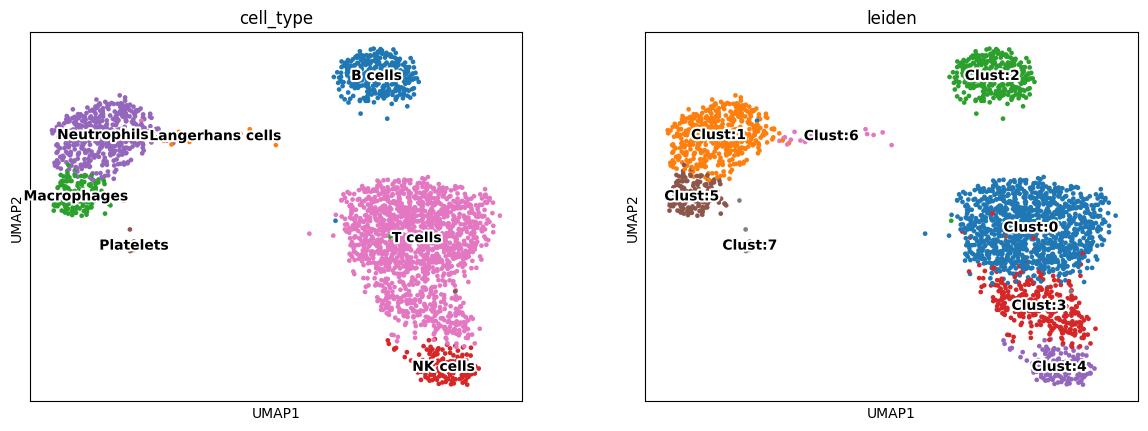

In [60]:
# Visualize in umap
sc.pl.umap(adata,
           color = ["cell_type", "leiden"],
           legend_loc = "on data",
           legend_fontoutline = 3,
           outline_color = "white")